**STEP -1 : Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


**STEP -2 : Loading the dataset**

In [ ]:
# using a CSV file from GitHub
url = "https://raw.githubusercontent.com/Bhavya3096/medical_insurance_prediction/main/insurance.csv"
data = pd.read_csv(url)

data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()       # Check missing values & data types
data.describe()   # Summary stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


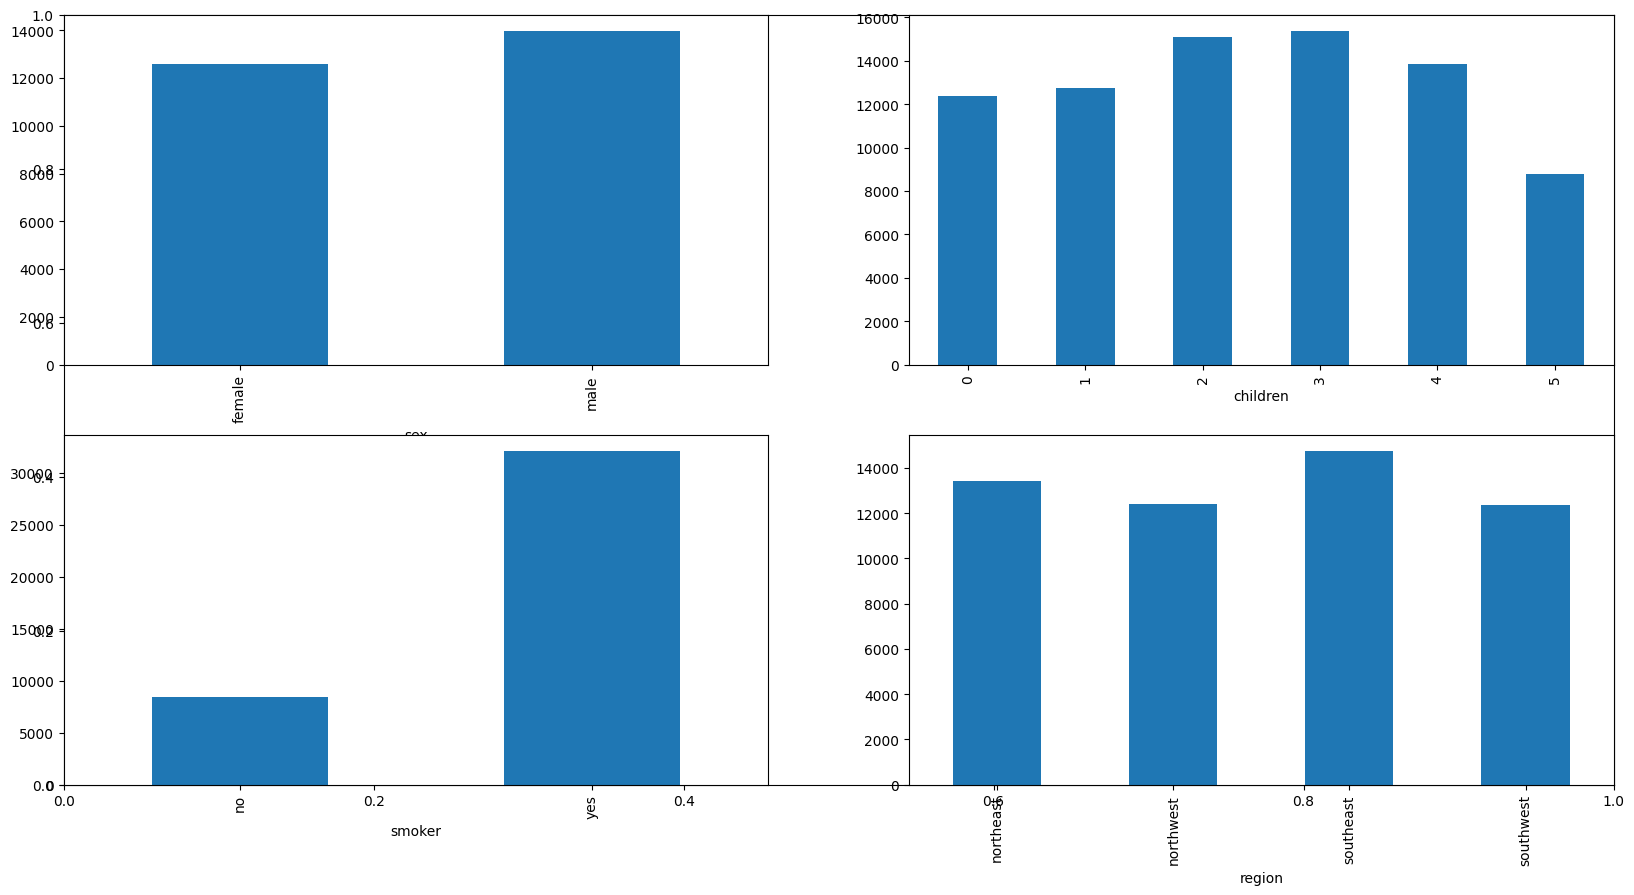

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize = (20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

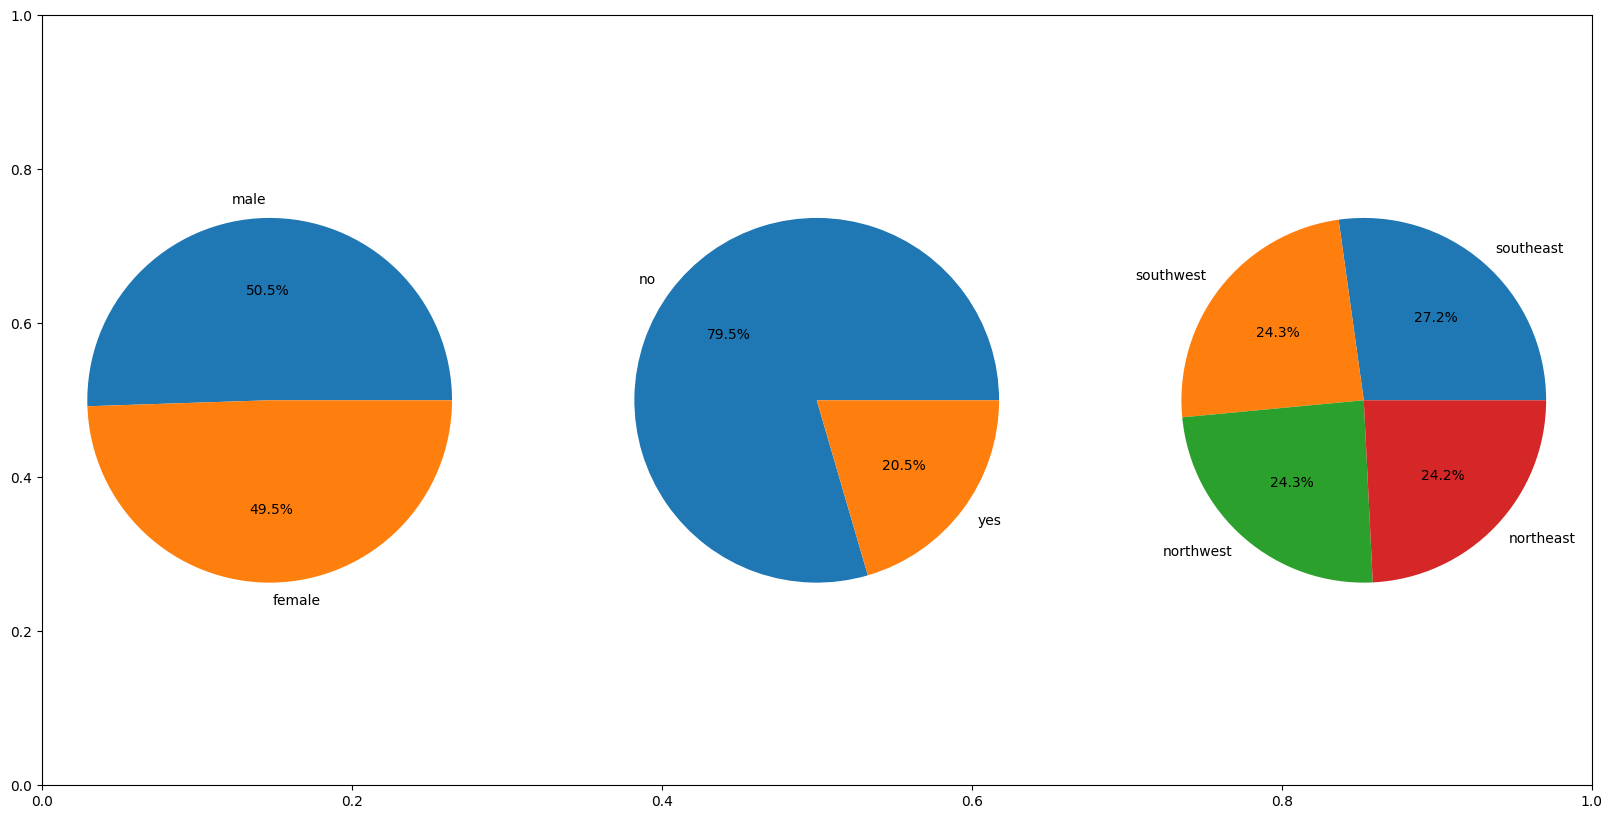

In [ ]:
features = ['sex','smoker', 'region']
plt.subplots(figsize = (20, 10))

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = data[col].value_counts()
    plt.pie(x.values, labels = x.index, autopct = "%1.1f%%")

plt.show()

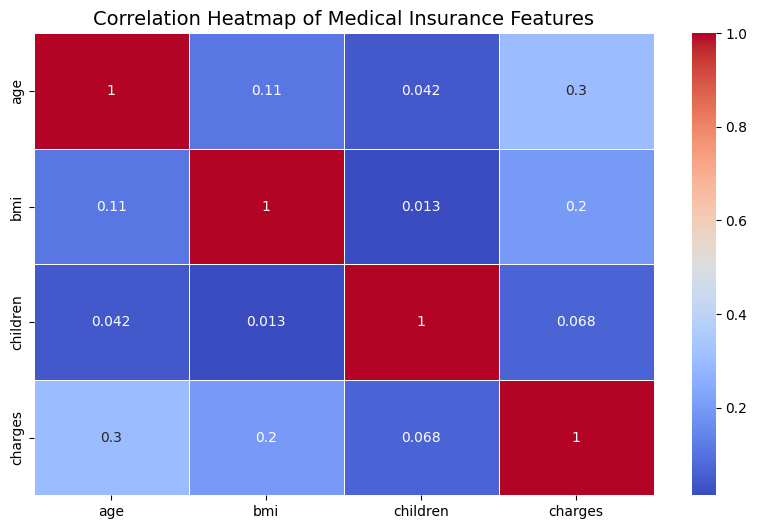

In [ ]:
# ---- Correlation Heatmap ----
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Medical Insurance Features", fontsize=14)
plt.show()

In [ ]:
# Split features and target
X = data.drop("charges", axis=1)
y = data["charges"]
# Identify categorical and numeric columns
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)])

**Splitting the data into training & testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1070, 6)

In [ ]:
X_test.shape

(268, 6)

**Train the Models**

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Train & evaluate
best_model_name = None
best_r2_score = -float('inf')
best_pipeline = None

for name, model in models.items():
    pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"---{name}---")
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Calculate RMSE manually
    r2 = r2_score(y_test, y_pred)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Square Error:", rmse)
    print("R²:", r2)
    print("\n")

    # Track the best model based on R² score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name
        best_pipeline = pipeline # Save the fitted pipeline of the best model

print(f"Best performing model is: {best_model_name} with R² score: {best_r2_score}")

---Linear Regression---
Mean Absolute Error: 4181.194473753652
Mean Squared Error: 33596915.851361476
Root Mean Square Error: 5796.284659276274
R²: 0.7835929767120722


---Decision Tree---
Mean Absolute Error: 2934.335915097015
Mean Squared Error: 37868754.09001305
Root Mean Square Error: 6153.759346124371
R²: 0.7560768856135891


---Random Forest---
Mean Absolute Error: 2541.614593844528
Mean Squared Error: 21003637.60876614
Root Mean Square Error: 4582.9725734250405
R²: 0.8647097634425496


---XGBoost---
Mean Absolute Error: 2604.33380438727
Mean Squared Error: 22454421.07426046
Root Mean Square Error: 4738.609614038749
R²: 0.8553648660539922


Best performing model is: Random Forest with R² score: 0.8647097634425496


/tmp/ipython-input-4265466317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette='viridis')


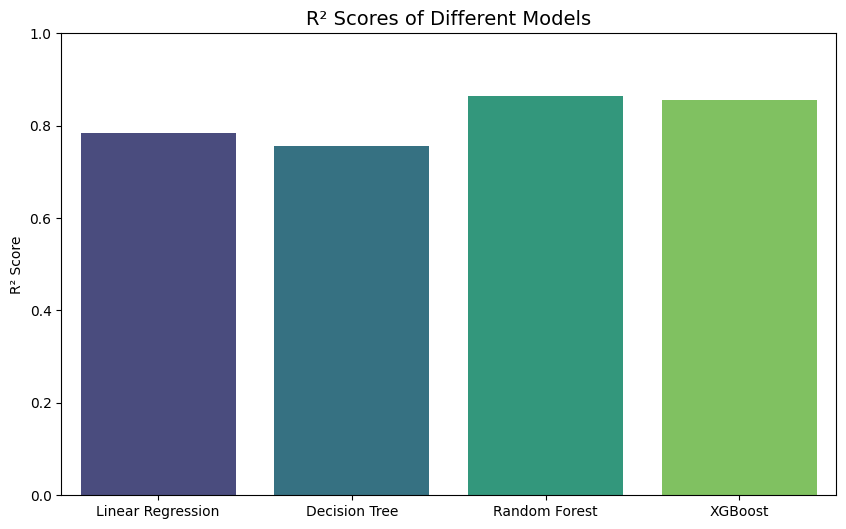

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store R² scores for plotting
r2_scores = {
    "Linear Regression": 0.7835929767120722,
    "Decision Tree": 0.7560768856135891,
    "Random Forest": 0.8647097634425496,
    "XGBoost": 0.8553648660539922
}

# Plotting the R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette='viridis')
plt.ylabel("R² Score")
plt.title("R² Scores of Different Models", fontsize=14)
plt.ylim(0, 1) # R² score is between 0 and 1
plt.show()

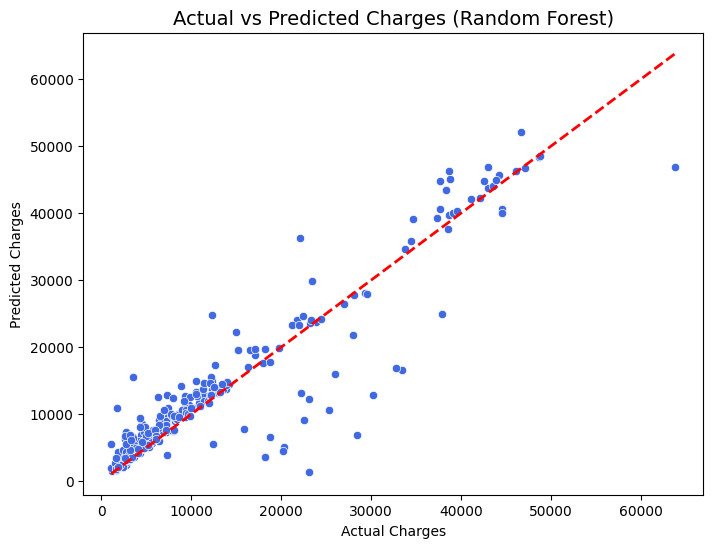

In [ ]:
# ---- Actual vs Predicted Plot ----
y_pred_best = best_pipeline.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Actual vs Predicted Charges ({best_model_name})", fontsize=14)
plt.show()

In [ ]:
# Save the best performing fitted pipeline
import joblib
joblib.dump(best_pipeline, "insurance_model.pkl")
print("Saved the best performing fitted pipeline to insurance_model.pkl")

Saved the best performing fitted pipeline to insurance_model.pkl


By observing the above metrics we may conclude that Random Forest is best suitable model for this dataset.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'model__n_estimators': randint(100, 300),
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 4)
}

random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=20,   # test only 20 random combos
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:46:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'region'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           earl...
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x780c97f24140>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x780c98b90470>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x780c98c54740>},
                   random_state=42, scoring='neg_mean_squared_error')

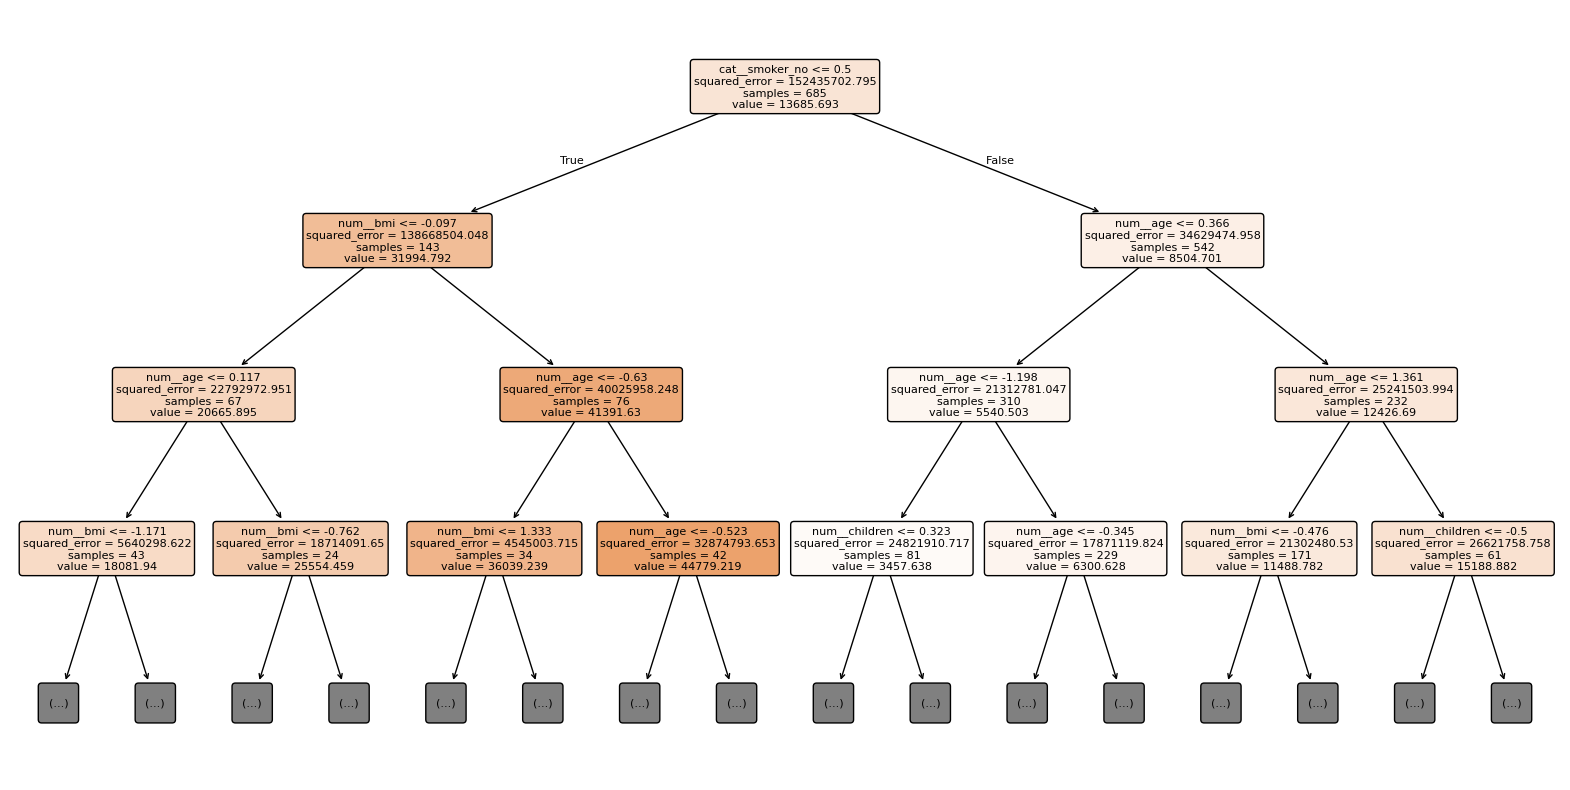

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
estimator = best_pipeline['model'].estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree( estimator, feature_names=preprocessor.get_feature_names_out(), filled=True, rounded=True, fontsize=8, max_depth=3)
plt.show()

In [ ]:
import joblib
# Save model
joblib.dump(pipeline, "insurance_model.pkl")

['insurance_model.pkl']

For Prediction:

In [ ]:

# Load the trained pipeline
try:
    pipeline = joblib.load("insurance_model.pkl")
except FileNotFoundError:
    print("Error: The model file 'insurance_model.pkl' was not found.")
    print("Please ensure you have trained and saved the model using the previous cells.")
    # You might want to exit or handle this case differently
    exit()

# Function for prediction
def predict_insurance(age, bmi, children, sex, smoker, region):
    input_data = pd.DataFrame({
        "age": [age],
        "bmi": [bmi],
        "children": [children],
        "sex": [sex],
        "smoker": [smoker],
        "region": [region]
    })
    # Use the loaded pipeline for prediction (it includes preprocessing)
    prediction = pipeline.predict(input_data)
    return prediction[0]

# ---- Take input from user ----
age = int(input("Enter Age: "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter Number of Children: "))
sex = input("Enter Sex (male/female): ").lower()
smoker = input("Are you a smoker? (yes/no): ").lower()
region = input("Enter Region (northeast/northwest/southeast/southwest): ").lower()
output = predict_insurance(age, bmi, children, sex, smoker, region)
print("\n     OUTPUT")
print(f"\n Predicted Insurance Charges: rs.{output:,.2f}")

Enter Age: 28
Enter BMI: 27.8
Enter Number of Children: 1
Enter Sex (male/female): male
Are you a smoker? (yes/no): yes
Enter Region (northeast/northwest/southeast/southwest): southwest

     OUTPUT

 Predicted Insurance Charges: rs.19,751.77


# Task
Connect the saved machine learning model "insurance_model.pkl" to a frontend interface.